<a href="https://colab.research.google.com/github/anandawln/project_final_idx-partners/blob/main/Final_Prediction_Model_IDX_Rakamin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Moch Alfan Miftachul Huda

#**Data Understanding**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/loan_data/loan_data_2007_2014.csv'

Mounted at /content/drive


In [ ]:
import pandas as pd


df = pd.read_csv(file_path)
df.head(10)




<ipython-input-2-202f21f84a6c>:4: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

#**DATA NUMERIK**

#**Features Related to the Loan Amount**




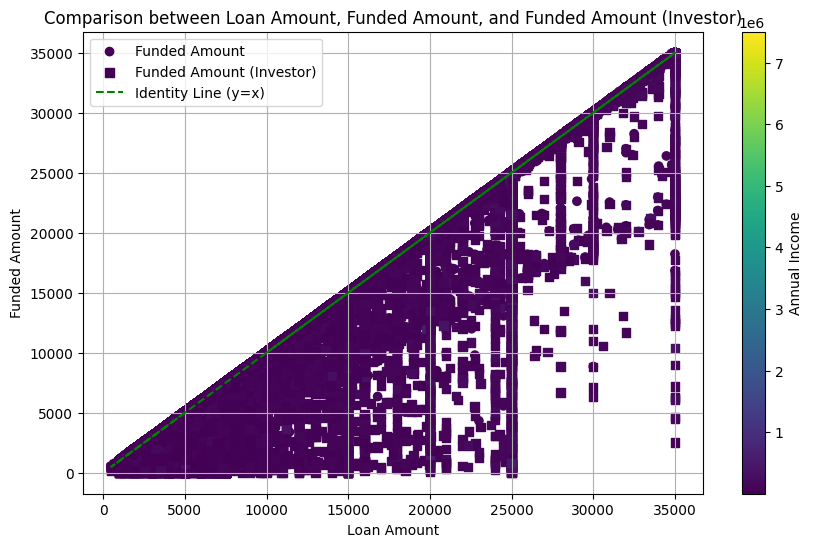

In [ ]:
import matplotlib.pyplot as plt



# Mengambil kolom yang diperlukan
loan_amnt = df['loan_amnt']
funded_amnt = df['funded_amnt']
funded_amnt_inv = df['funded_amnt_inv']
annual_inc = df['annual_inc']

# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(loan_amnt, funded_amnt, c=annual_inc, cmap='viridis', label='Funded Amount')
plt.scatter(loan_amnt, funded_amnt_inv, c=annual_inc, cmap='viridis', marker='s', label='Funded Amount (Investor)')
plt.plot(loan_amnt, loan_amnt, color='green', linestyle='--', label='Identity Line (y=x)')

# Menambahkan label dan judul
plt.xlabel('Loan Amount')
plt.ylabel('Funded Amount')
plt.title('Comparison between Loan Amount, Funded Amount, and Funded Amount (Investor)')
plt.colorbar(label='Annual Income')
plt.legend()

# Menampilkan plot
plt.grid(True)
plt.show()
#analisa tentang bagaimana pemberi pinjaman dan investor menanggapi permintaan pinjaman dari peminjam
# dan bagaimana sebenarnya penyaluran dana dilakukan dalam praktiknya.

Tingkat Persetujuan Pinjaman:
-------------------------------
Jumlah Pinjaman yang Disetujui: 355397
Jumlah Pinjaman yang Ditolak: 110888


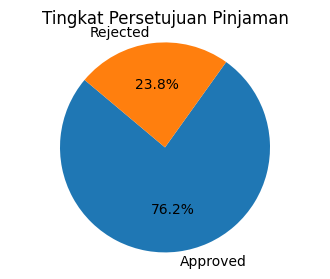

In [ ]:
# Menghitung rasio antara loan_amnt dan annual_inc
df['loan_to_income_ratio'] = df['loan_amnt'] / df['annual_inc']

# Fungsi untuk menentukan status persetujuan pinjaman berdasarkan rasio
def approval_status(ratio):
    if ratio <= 0.3:  # Misalnya, kita anggap persetujuan pinjaman jika rasio <= 0.3
        return 'Approved'
    else:
        return 'Rejected'

# Menambahkan kolom status persetujuan pinjaman
df['approval_status'] = df['loan_to_income_ratio'].apply(approval_status)

# Menghitung jumlah pinjaman yang disetujui dan ditolak
approval_counts = df['approval_status'].value_counts()

# Output hasil
print("Tingkat Persetujuan Pinjaman:")
print("-------------------------------")
print("Jumlah Pinjaman yang Disetujui:", approval_counts['Approved'])
print("Jumlah Pinjaman yang Ditolak:", approval_counts['Rejected'])

# Membuat diagram lingkaran untuk visualisasi tingkat persetujuan pinjaman
plt.figure(figsize=(4, 3))
plt.pie(approval_counts, labels=approval_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Tingkat Persetujuan Pinjaman')
plt.axis('equal')  # Agar lingkaran terlihat bulat
plt.show()

#**Payment-Related Features**

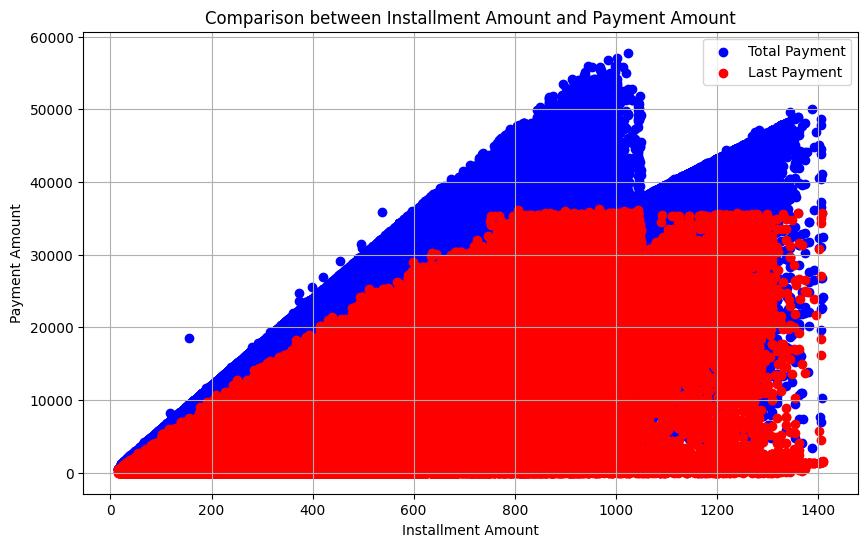

In [ ]:
# Mengambil kolom yang diperlukan
installment = df['installment']
total_payment = df['total_pymnt']
last_payment = df['last_pymnt_amnt']

# Membuat scatter plot
plt.figure(figsize=(10, 6))

plt.scatter(installment, total_payment, color='blue', label='Total Payment')
plt.scatter(installment, last_payment, color='red', label='Last Payment')

# Menambahkan label dan judul
plt.xlabel('Installment Amount')
plt.ylabel('Payment Amount')
plt.title('Comparison between Installment Amount and Payment Amount')
plt.legend()

# Menampilkan plot
plt.grid(True)
plt.show()

#pola hubungan tentang keefektifan pembayaran peminjam dan kemungkinan risiko terkait dengan pembayaran.

#**Features Related to Credit and Debt**


1.   Borrower's Credit and Debt
2.   Account and Credit Usage
3.   Loan Repayment



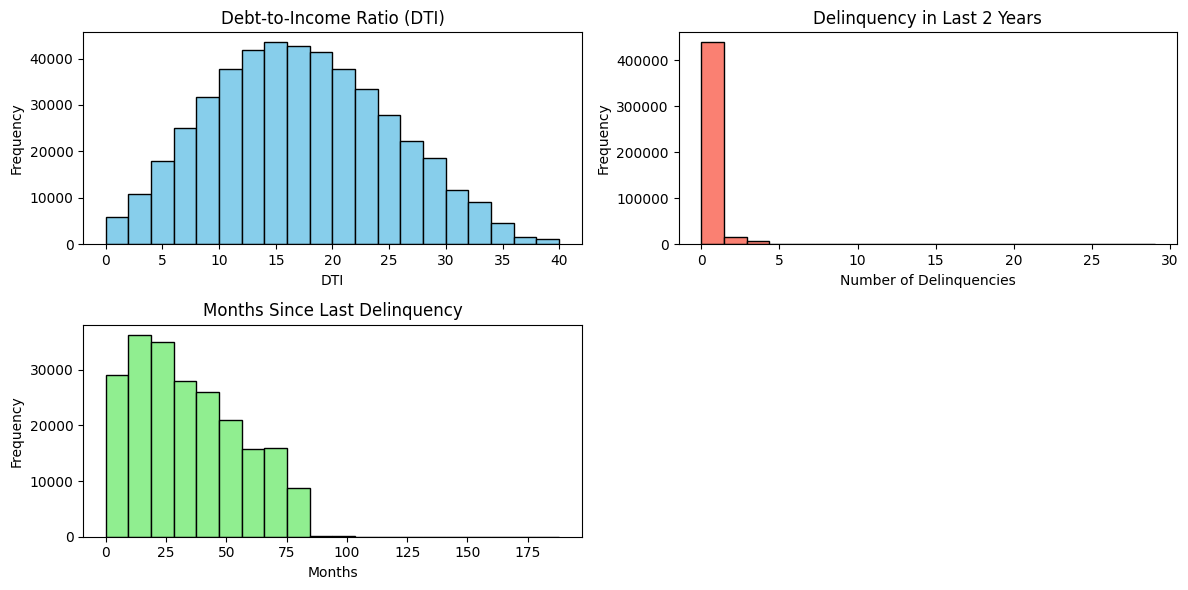

In [ ]:
#Borrower's Credit and Debt
# Mengambil kolom yang diperlukan untuk kelompok 1
dti = df['dti']
delinq_2yrs = df['delinq_2yrs']
mths_since_last_delinq = df['mths_since_last_delinq']

# Plotting
plt.figure(figsize=(12, 6))

# Plot untuk DTI
plt.subplot(2, 2, 1)
plt.hist(dti, bins=20, color='skyblue', edgecolor='black')
plt.title('Debt-to-Income Ratio (DTI)')
plt.xlabel('DTI')
plt.ylabel('Frequency')

# Plot untuk Delinquency dalam 2 tahun terakhir
plt.subplot(2, 2, 2)
plt.hist(delinq_2yrs, bins=20, color='salmon', edgecolor='black')
plt.title('Delinquency in Last 2 Years')
plt.xlabel('Number of Delinquencies')
plt.ylabel('Frequency')

# Plot untuk Jumlah Bulan sejak Keterlambatan Pembayaran Terakhir
plt.subplot(2, 2, 3)
plt.hist(mths_since_last_delinq.dropna(), bins=20, color='lightgreen', edgecolor='black')
plt.title('Months Since Last Delinquency')
plt.xlabel('Months')
plt.ylabel('Frequency')

# Menampilkan plot
plt.tight_layout()
plt.show()

# histogram DTI melihat seberapa banyak peminjam yang memiliki rasio utang yang tinggi, yang dapat menunjukkan risiko keuangan.
#Histogram untuk delinquency dalam 2 tahun terakhir dan jumlah bulan sejak keterlambatan pembayaran terakhir akan memberikan informasi
# tentang seberapa sering peminjam mengalami keterlambatan pembayaran dan berapa lama sejak keterlambatan terakhir tersebut.

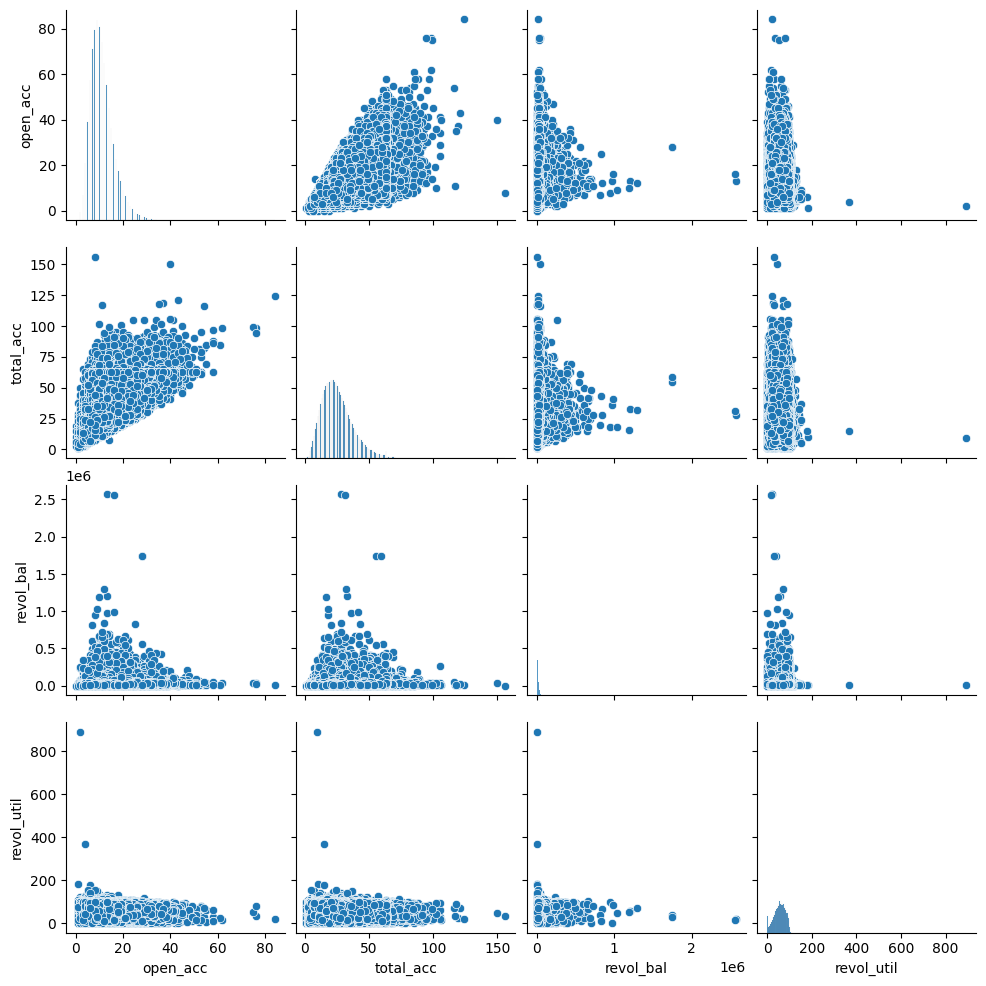

In [ ]:
#Account and Credit Usage
# Mengambil kolom yang diperlukan untuk kelompok 2
import seaborn as sns
open_acc = df['open_acc']
total_acc = df['total_acc']
revol_bal = df['revol_bal']
revol_util = df['revol_util']

# Membuat pairplot untuk melihat korelasi antar variabel
sns.pairplot(df[['open_acc', 'total_acc', 'revol_bal', 'revol_util']])
plt.show()


#memahami hubungan antara jumlah akun terbuka, jumlah total akun,
#saldo total akun revolving, dan tingkat penggunaan kredit revolving, serta distribusi dari masing-masing fitur tersebut.

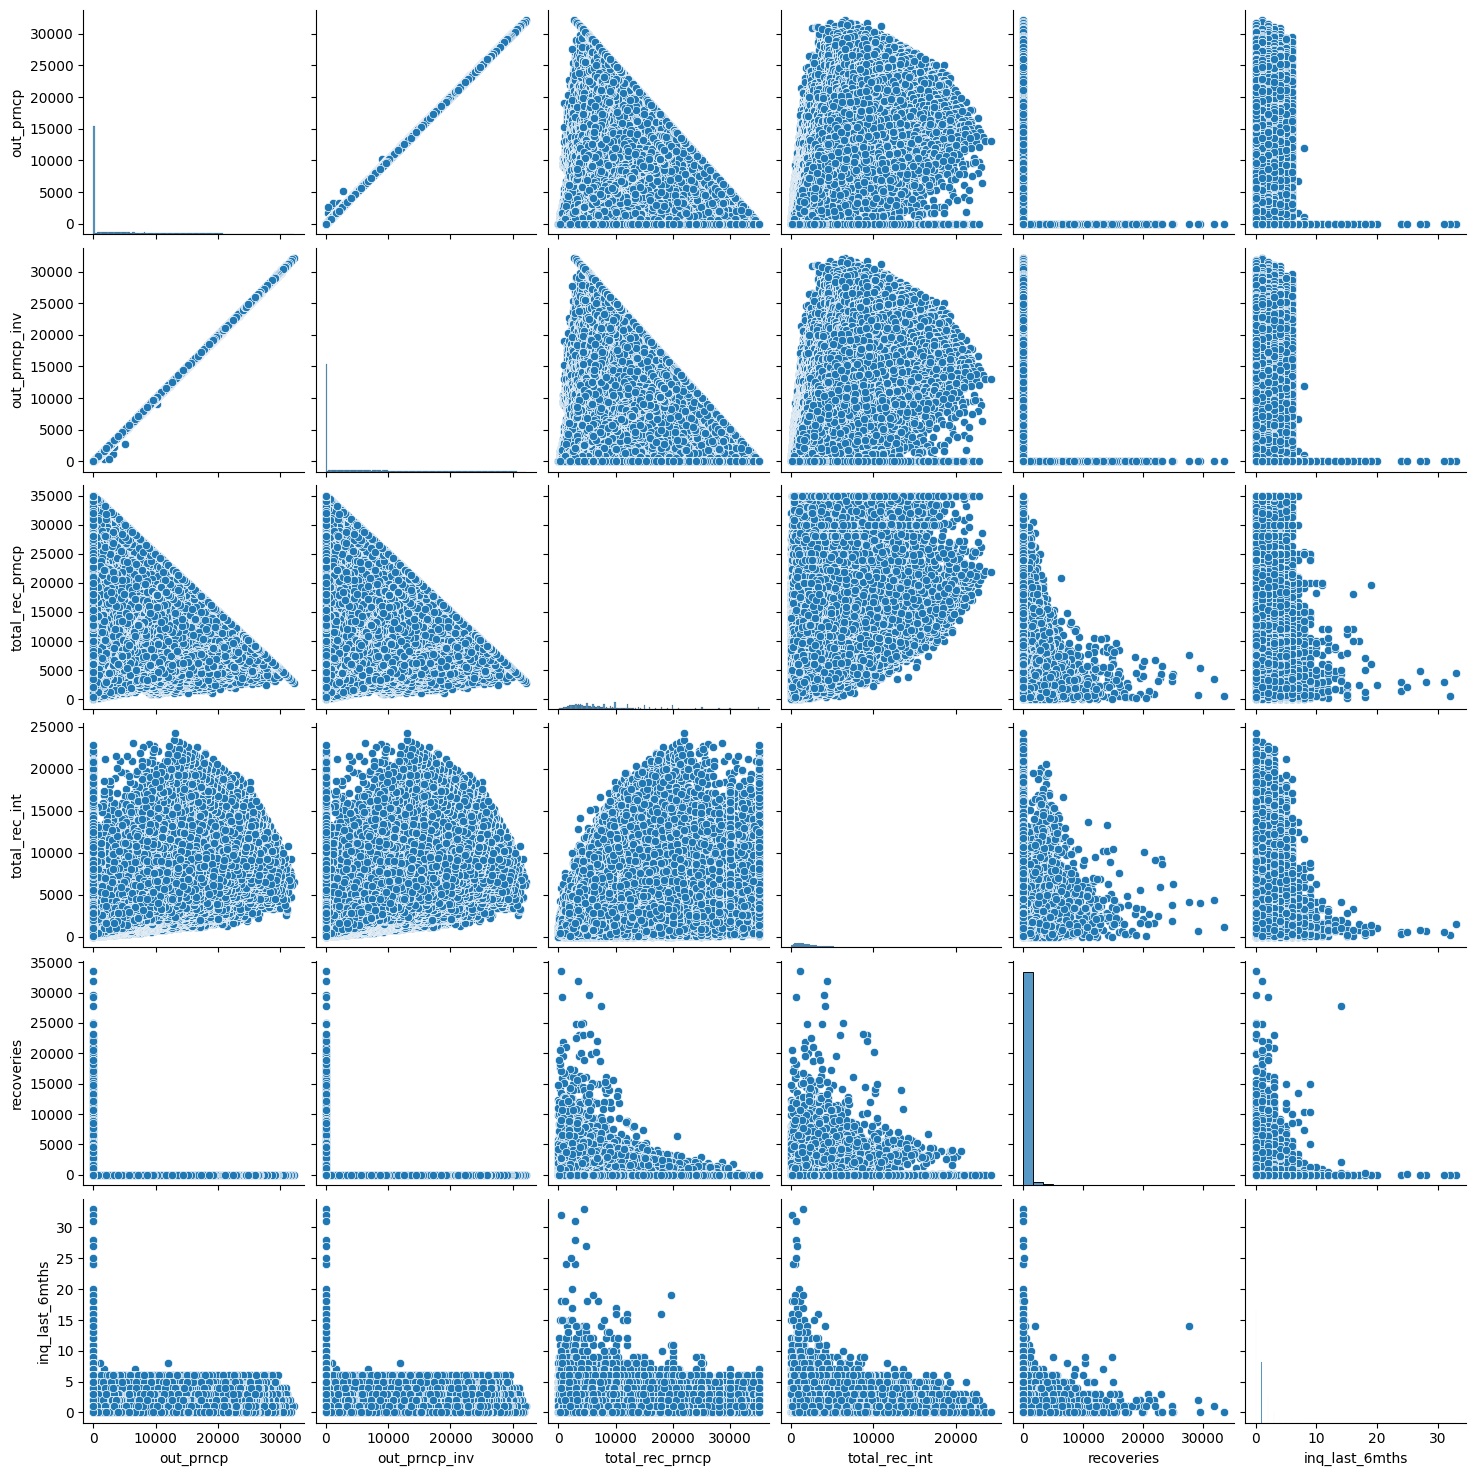

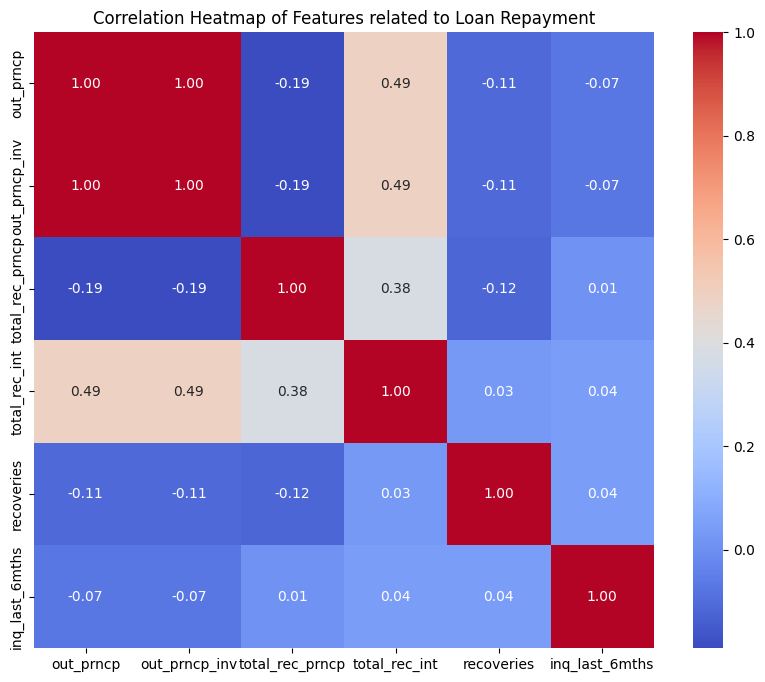

In [ ]:
#Loan Repayment
# Mengambil kolom yang diperlukan untuk kelompok 3
out_prncp = df['out_prncp']
out_prncp_inv = df['out_prncp_inv']
total_rec_prncp = df['total_rec_prncp']
total_rec_int = df['total_rec_int']
recoveries = df['recoveries']
inq_last_6mths = df['inq_last_6mths']

# Membuat pairplot untuk melihat korelasi antar variabel
sns.pairplot(df[['out_prncp', 'out_prncp_inv', 'total_rec_prncp', 'total_rec_int', 'recoveries', 'inq_last_6mths']])
plt.show()

# Membuat heatmap korelasi
correlation_matrix = df[['out_prncp', 'out_prncp_inv', 'total_rec_prncp', 'total_rec_int', 'recoveries', 'inq_last_6mths']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features related to Loan Repayment')
plt.show()

# memahami hubungan antara saldo sisa pokok pinjaman, total pokok yang telah diterima,
#total bunga yang telah diterima, jumlah pembayaran yang diterima setelah pemulihan dari pinjaman yang macet,
#dan jumlah pertanyaan kredit dalam enam bulan terakhir serta mengidentifikasi fitur yang mungkin saling berkorelasi.

#**DATA KATEGORIKAL**

#**Features Related to Loan Conditions**

Mean Squared Error: 0.7702554781590281


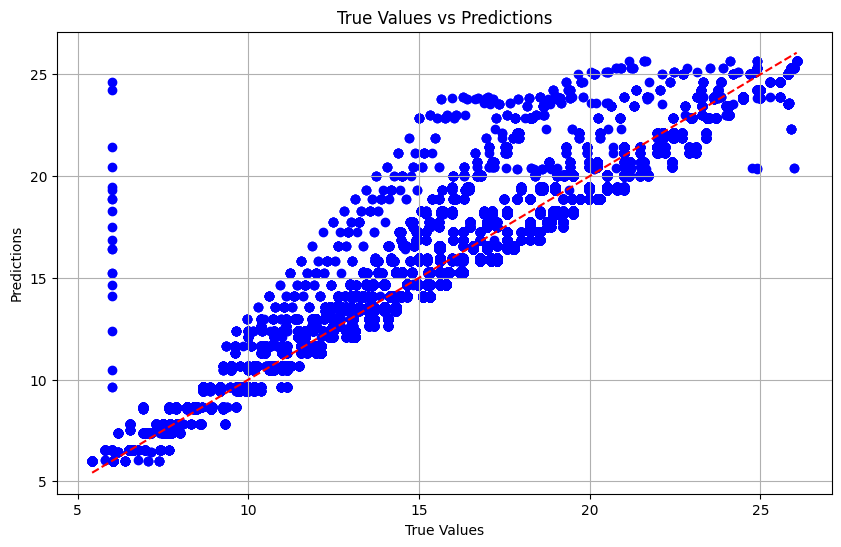

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

#prediksi status pinjaman

# Mengambil fitur-fitur yang akan digunakan untuk prediksi
features = ['term', 'grade', 'sub_grade']

# Menggunakan LabelEncoder untuk mengkodekan fitur kategorikal menjadi numerik
label_encoders = {}
for feature in features:
    label_encoders[feature] = LabelEncoder()
    df[feature] = label_encoders[feature].fit_transform(df[feature])

# Pisahkan fitur dan target
X = df[features]
y = df['int_rate']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Latih model
model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Hitung Mean Squared Error sebagai metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualisasikan prediksi vs nilai sebenarnya
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.grid(True)
plt.show()

#Dalam visualisasi ini, sumbu x menunjukkan nilai sebenarnya (y_test) dan sumbu y menunjukkan nilai
#  yang diprediksi (y_pred). Garis merah menunjukkan garis identitas, di mana titik-titik yang berada
#  di atas garis ini menandakan bahwa nilai prediksi lebih tinggi dari nilai sebenarnya, dan titik-titik
#  di bawah garis ini menandakan bahwa nilai prediksi lebih rendah dari nilai sebenarnya. Semakin dekat
#  titik-titik dengan garis ini, semakin baik model kita dalam memprediksi nilai target



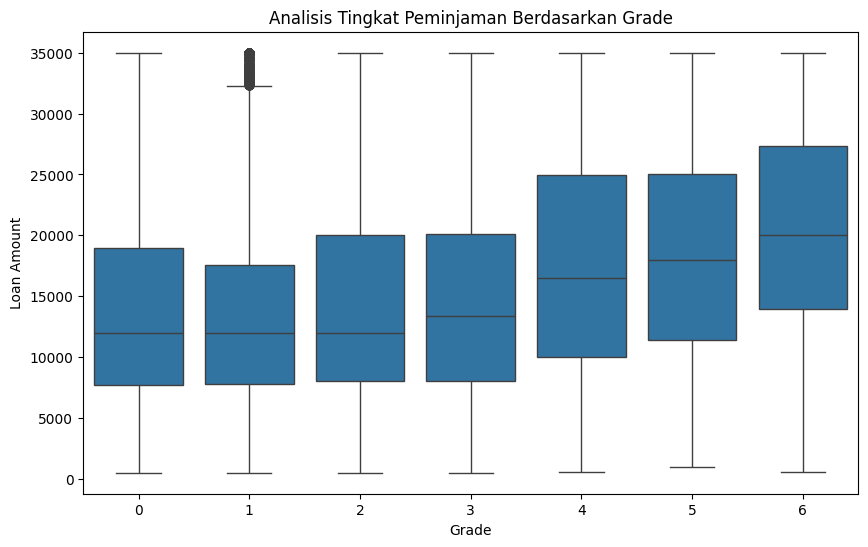

Accuracy: 0.6216155355630141
Confusion Matrix:
[[   58  4738     0     3    18  3652     0     0     0]
 [   37 38542     0     0     0  6314     1     0     0]
 [    0   161     0     0     0    12     0     0     0]
 [    1     1     0     4    35   107     0     0     0]
 [    2     6     0    10    87   272     0     0     0]
 [   66 17516     0     8    37 19279     0     0     0]
 [    1   537     0     0     0   115     0     0     0]
 [    1   191     0     0     0    45     0     0     0]
 [    3  1211     0     0     0   186     0     0     0]]


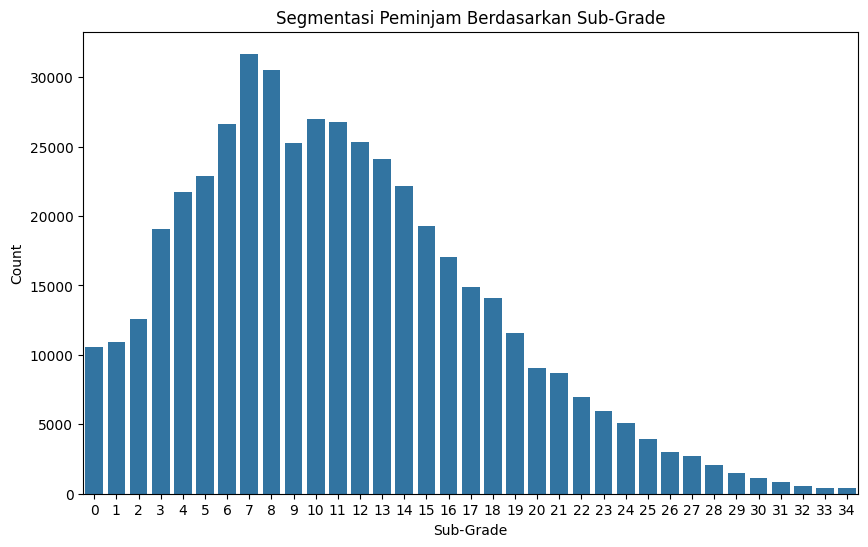

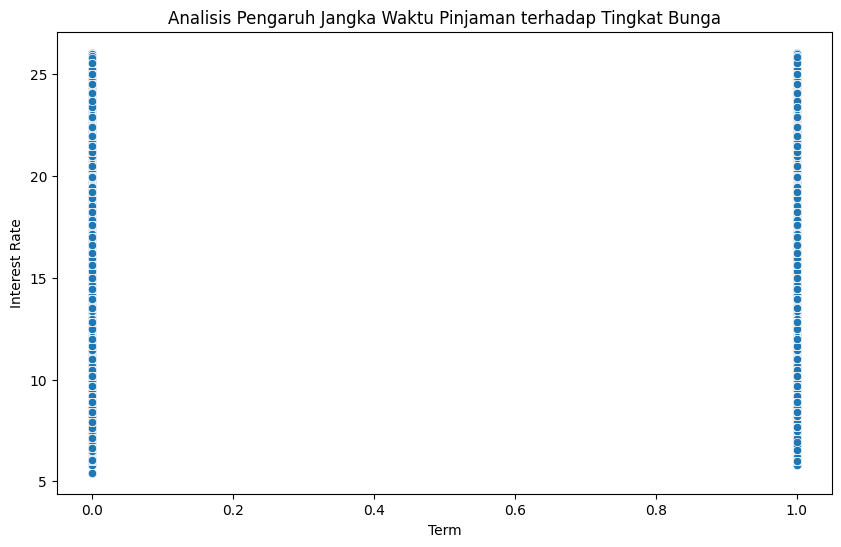

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
# Preprocessing: Encoding fitur kategorikal
label_encoders = {}
categorical_features = ['grade', 'sub_grade', 'term']
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    df[feature] = label_encoders[feature].fit_transform(df[feature])

# 1. Analisis Tingkat Peminjaman Berdasarkan Grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='loan_amnt', data=df)
plt.title('Analisis Tingkat Peminjaman Berdasarkan Grade')
plt.xlabel('Grade')
plt.ylabel('Loan Amount')
plt.show()

# 2. Prediksi Status Pinjaman
X = df[['term', 'int_rate', 'grade', 'sub_grade']]
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 3. Segmentasi Peminjam Berdasarkan Sub-Grade
plt.figure(figsize=(10, 6))
sns.countplot(x='sub_grade', data=df, order=sorted(df['sub_grade'].unique()))
plt.title('Segmentasi Peminjam Berdasarkan Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Count')
plt.show()

# 4. Analisis Pengaruh Jangka Waktu Pinjaman terhadap Tingkat Bunga
plt.figure(figsize=(10, 6))
sns.scatterplot(x='term', y='int_rate', data=df)
plt.title('Analisis Pengaruh Jangka Waktu Pinjaman terhadap Tingkat Bunga')
plt.xlabel('Term')
plt.ylabel('Interest Rate')
plt.show()

#**Features Related to Borrower Profile**

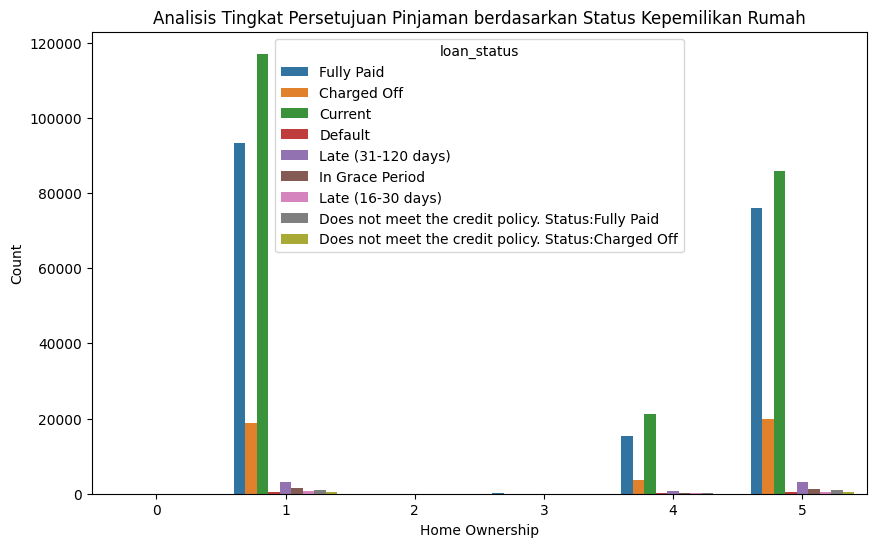

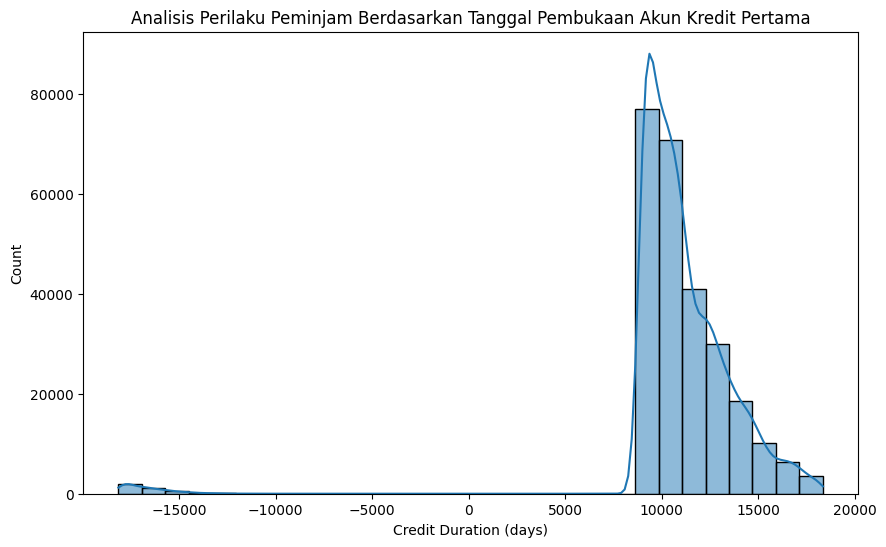

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder



# Preprocessing: Encoding fitur kategorikal
label_encoders = {}
categorical_features = ['home_ownership']
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    df[feature] = label_encoders[feature].fit_transform(df[feature])



# 1. Analisis Tingkat Persetujuan Pinjaman berdasarkan Status Kepemilikan Rumah
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=df)
plt.title('Analisis Tingkat Persetujuan Pinjaman berdasarkan Status Kepemilikan Rumah')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

# 2. Analisis Perilaku Peminjam Berdasarkan Tanggal Pembukaan Akun Kredit Pertama
# Konversi earliest_cr_line ke dalam format tanggal
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors='coerce')


# Hitung durasi kredit dari earliest_cr_line hingga sekarang
df['credit_duration'] = (pd.Timestamp.now() - df['earliest_cr_line']).dt.days

plt.figure(figsize=(10, 6))
sns.histplot(df['credit_duration'], bins=30, kde=True)
plt.title('Analisis Perilaku Peminjam Berdasarkan Tanggal Pembukaan Akun Kredit Pertama')
plt.xlabel('Credit Duration (days)')
plt.ylabel('Count')
plt.show()




#**Data Preparation**

In [ ]:
# Daftar kolom yang dipilih
kolom = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
    'grade', 'sub_grade', 'home_ownership', 'annual_inc', 'loan_status',
    'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
    'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
    'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt']

# Menampilkan data untuk kolom yang dipilih
selecting_df = df[kolom]

# Menampilkan DataFrame yang hanya berisi kolom yang dipilih
selecting_df.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,RENT,24000.0,...,13648,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,171.62
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,RENT,30000.0,...,1687,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,119.66
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,RENT,12252.0,...,2956,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,649.91
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,RENT,49200.0,...,5598,21.0,37.0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,357.48
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,RENT,80000.0,...,27783,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,67.79


In [ ]:
selecting_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,...,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000
mean,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,...,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,3123.913796
std,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,...,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5554.737393
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,...,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,312.620000
50%,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,...,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,545.960000
75%,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,...,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,3187.510000
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,33.000000,188.000000,...,2.568995e+06,892.300000,156.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.030000,24205.620000,36234.440000


In [ ]:
missing_data = selecting_df.isnull().sum()

# Menampilkan jumlah data yang hilang untuk setiap kolom
print("Jumlah data yang hilang untuk setiap kolom:")
print(missing_data[missing_data > 0])

Jumlah data yang hilang untuk setiap kolom:
annual_inc                     4
delinq_2yrs                   29
inq_last_6mths                29
mths_since_last_delinq    250351
open_acc                      29
revol_util                   340
total_acc                     29
dtype: int64


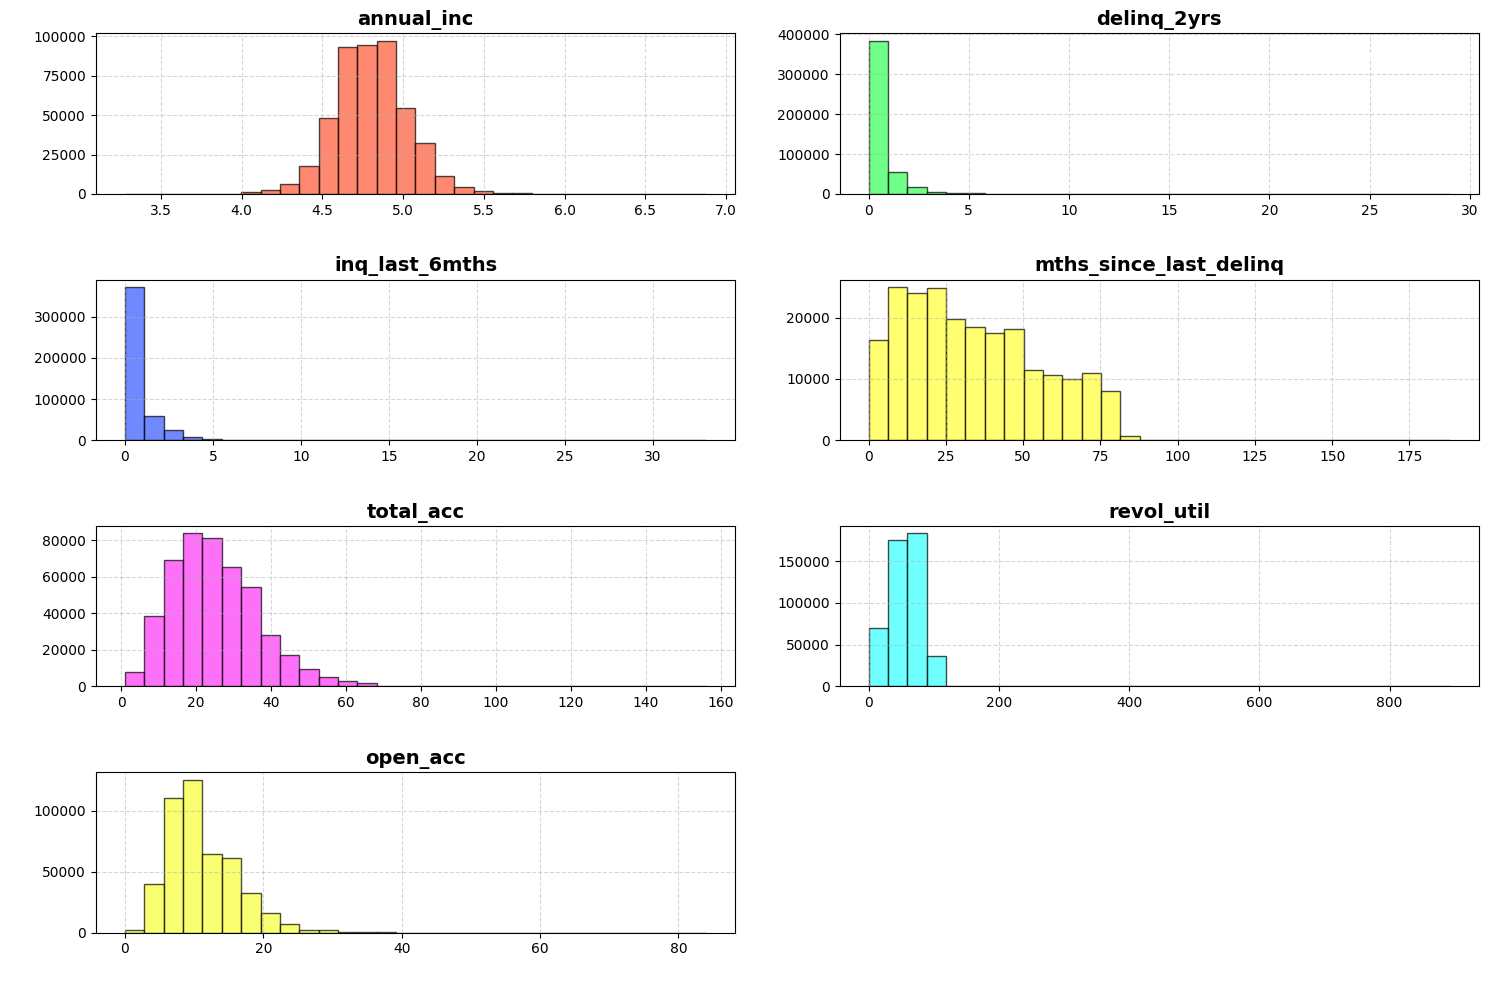

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

kolom = ['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'total_acc', 'revol_util', 'open_acc']
colors = ['#FF5733', '#33FF57', '#3357FF', '#FFFF33', '#FF33F7', '#33FFFF', '#F7FF33']

plt.figure(figsize=(15, 10))

for i, col in enumerate(kolom):
    ax = plt.subplot(4, 2, i+1)

    if col == 'annual_inc':
        data_transformed = np.log10(selecting_df[col] + 1)

        plt.hist(data_transformed, bins=30, color=colors[i], edgecolor='black', alpha=0.7)
        plt.xlabel('Nilai (log10)', fontsize=12, color='white')
        plt.ylabel('Frekuensi', fontsize=12, color='white')

        skewness = data_transformed.skew()
        skew_label = f'Skewness: {skewness:.2f}'
    else:
        plt.hist(selecting_df[col], bins=30, color=colors[i], edgecolor='black', alpha=0.7)
        plt.xlabel('Nilai', fontsize=12, color='white')
        plt.ylabel('Frekuensi', fontsize=12, color='white')

        skewness = selecting_df[col].skew()
        skew_label = f'Skewness: {skewness:.2f}'

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.text(0.95, 0.9, skew_label, fontsize=10, ha='right', va='top', transform=ax.transAxes, color='white')

    # Menambahkan judul sesuai dengan nama kolom
    plt.title(col, fontsize=14, color='black',fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
mean_annual_inc = selecting_df['annual_inc'].mean()

selecting_df['annual_inc'].fillna(mean_annual_inc, inplace=True)

<ipython-input-7-769430db2f59>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecting_df['annual_inc'].fillna(mean_annual_inc, inplace=True)


In [ ]:
modus_delinq_2yrs = selecting_df['delinq_2yrs'].mode()[0]
selecting_df['delinq_2yrs'].fillna(modus_delinq_2yrs, inplace=True)

<ipython-input-8-1a5e0a2e953c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecting_df['delinq_2yrs'].fillna(modus_delinq_2yrs, inplace=True)


In [ ]:
mode_inq = selecting_df ['inq_last_6mths'].mode()[0]

selecting_df ['inq_last_6mths'].fillna(mode_inq, inplace=True)

<ipython-input-9-11df4cfb0995>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecting_df ['inq_last_6mths'].fillna(mode_inq, inplace=True)


In [ ]:
selecting_df['mths_since_last_delinq'].fillna(0, inplace=True)

<ipython-input-10-2724d04d2860>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecting_df['mths_since_last_delinq'].fillna(0, inplace=True)


In [ ]:
median_total_acc = selecting_df['total_acc'].median()

selecting_df['total_acc'].fillna(median_total_acc, inplace=True)

<ipython-input-11-027a8e1937e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecting_df['total_acc'].fillna(median_total_acc, inplace=True)


In [ ]:
median_rev = selecting_df['revol_util'].median()

selecting_df['revol_util'].fillna(median_rev, inplace=True)

<ipython-input-12-204556c1c7c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecting_df['revol_util'].fillna(median_rev, inplace=True)


In [ ]:
median_open_acc = selecting_df['open_acc'].median()

selecting_df['open_acc'].fillna(median_open_acc, inplace=True)

<ipython-input-13-30a76cc8c700>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecting_df['open_acc'].fillna(median_open_acc, inplace=True)


In [ ]:
missing_data = selecting_df.isnull().sum()

# Menampilkan jumlah data yang hilang untuk setiap kolom
print("Jumlah data yang hilang untuk setiap kolom:")
print(missing_data[missing_data > 0])

Jumlah data yang hilang untuk setiap kolom:
Series([], dtype: int64)


In [ ]:
print(selecting_df.head(10))

   loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       5000         5000           4975.0   36 months     10.65       162.87   
1       2500         2500           2500.0   60 months     15.27        59.83   
2       2400         2400           2400.0   36 months     15.96        84.33   
3      10000        10000          10000.0   36 months     13.49       339.31   
4       3000         3000           3000.0   60 months     12.69        67.79   
5       5000         5000           5000.0   36 months      7.90       156.46   
6       7000         7000           7000.0   60 months     15.96       170.08   
7       3000         3000           3000.0   36 months     18.64       109.43   
8       5600         5600           5600.0   60 months     21.28       152.39   
9       5375         5375           5350.0   60 months     12.69       121.45   

  grade sub_grade home_ownership  annual_inc  ... revol_bal  revol_util  \
0     B        B2           RENT 

#**DATA PREPROCESSING**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#normalisasi data

columns_to_normalize = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
                        'installment', 'annual_inc', 'mths_since_last_delinq',
                        'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
                        'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int']

selecting_df[columns_to_normalize] = scaler.fit_transform(selecting_df[columns_to_normalize])
selecting_df.head(5)

<ipython-input-16-85959e72e00f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecting_df[columns_to_normalize] = scaler.fit_transform(selecting_df[columns_to_normalize])


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
0,0.130435,0.130435,0.142143,36 months,0.253391,0.105571,B,B2,RENT,0.002948,...,0.005313,83.7,9.0,0.000000,0.000000,0.101442,0.100935,0.142857,0.035573,171.62
1,0.057971,0.057971,0.071429,60 months,0.477229,0.031671,C,C4,RENT,0.003748,...,0.000657,9.4,4.0,0.000000,0.000000,0.017459,0.017459,0.013042,0.017978,119.66
2,0.055072,0.055072,0.068571,36 months,0.510659,0.049243,C,C5,RENT,0.001381,...,0.001151,98.5,10.0,0.000000,0.000000,0.051986,0.051986,0.068571,0.024938,649.91
3,0.275362,0.275362,0.285714,36 months,0.390988,0.232113,C,C1,RENT,0.006309,...,0.002179,21.0,37.0,0.000000,0.000000,0.211610,0.211610,0.285714,0.091273,357.48
4,0.072464,0.072464,0.085714,60 months,0.352229,0.037380,B,B5,RENT,0.010416,...,0.010815,53.9,38.0,0.023846,0.023846,0.056115,0.056115,0.063803,0.041687,67.79


In [ ]:
print(selecting_df.head(5))

   loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0   0.130435     0.130435         0.142143   36 months  0.253391     0.105571   
1   0.057971     0.057971         0.071429   60 months  0.477229     0.031671   
2   0.055072     0.055072         0.068571   36 months  0.510659     0.049243   
3   0.275362     0.275362         0.285714   36 months  0.390988     0.232113   
4   0.072464     0.072464         0.085714   60 months  0.352229     0.037380   

  grade sub_grade home_ownership  annual_inc  ... revol_bal  revol_util  \
0     B        B2           RENT    0.002948  ...  0.005313        83.7   
1     C        C4           RENT    0.003748  ...  0.000657         9.4   
2     C        C5           RENT    0.001381  ...  0.001151        98.5   
3     C        C1           RENT    0.006309  ...  0.002179        21.0   
4     B        B5           RENT    0.010416  ...  0.010815        53.9   

   total_acc  out_prncp  out_prncp_inv  total_pymnt  total_pym

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Menggunakan LabelEncoder untuk mengubah kolom 'term' menjadi numerik
selecting_df['term_encoded'] = label_encoder.fit_transform(selecting_df['term'])

# Menampilkan hasil
print(selecting_df[['term', 'term_encoded']].head())
#hapus kolom term supaya tidak terjadi tabrakan dengan kolom term_encode
selecting_df.drop(columns=['term'], inplace=True)




         term  term_encoded
0   36 months             0
1   60 months             1
2   36 months             0
3   36 months             0
4   60 months             1


<ipython-input-18-c7ced17b1316>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecting_df['term_encoded'] = label_encoder.fit_transform(selecting_df['term'])
<ipython-input-18-c7ced17b1316>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecting_df.drop(columns=['term'], inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identifikasi nilai kategori unik dalam kolom 'grade' pada data latih
unique_grades = selecting_df['grade'].unique()

# Buat pemetaan berdasarkan nilai kategori unik
grade_mapping = {grade: idx for idx, grade in enumerate(unique_grades)}

label_encoder = LabelEncoder()
selecting_df['grade_encoded'] = label_encoder.fit_transform(selecting_df['grade'])

# Tampilkan hasil
print(selecting_df[['grade', 'grade_encoded']].head())

# Hapus kolom 'grade' yang sudah diencode
selecting_df.drop(columns=['grade'], inplace=True)



  grade  grade_encoded
0     B              1
1     C              2
2     C              2
3     C              2
4     B              1


<ipython-input-19-57939f3441fd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecting_df['grade_encoded'] = label_encoder.fit_transform(selecting_df['grade'])
<ipython-input-19-57939f3441fd>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecting_df.drop(columns=['grade'], inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Pemetaan untuk sub_grade
selecting_df['sub_grade_encoded'] = label_encoder.fit_transform(selecting_df['sub_grade'])

# Pemetaan untuk home_ownership
selecting_df['home_ownership_encoded'] = label_encoder.fit_transform(selecting_df['home_ownership'])

# Menampilkan hasil pemetaan
print(selecting_df[['sub_grade', 'sub_grade_encoded']].head())
print(selecting_df[['home_ownership', 'home_ownership_encoded']].head())
selecting_df.drop(columns=['sub_grade', 'home_ownership'], inplace=True)
print(selecting_df.head(5))



  sub_grade  sub_grade_encoded
0        B2                  6
1        C4                 13
2        C5                 14
3        C1                 10
4        B5                  9
  home_ownership  home_ownership_encoded
0           RENT                       5
1           RENT                       5
2           RENT                       5
3           RENT                       5
4           RENT                       5
   loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  annual_inc  \
0   0.130435     0.130435         0.142143  0.253391     0.105571    0.002948   
1   0.057971     0.057971         0.071429  0.477229     0.031671    0.003748   
2   0.055072     0.055072         0.068571  0.510659     0.049243    0.001381   
3   0.275362     0.275362         0.285714  0.390988     0.232113    0.006309   
4   0.072464     0.072464         0.085714  0.352229     0.037380    0.010416   

   loan_status    dti  delinq_2yrs  inq_last_6mths  ...  out_prncp_inv  \
0   Ful

<ipython-input-20-08d3ef2d0000>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecting_df['sub_grade_encoded'] = label_encoder.fit_transform(selecting_df['sub_grade'])
<ipython-input-20-08d3ef2d0000>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecting_df['home_ownership_encoded'] = label_encoder.fit_transform(selecting_df['home_ownership'])
<ipython-input-20-08d3ef2d0000>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

#**Labeling**

In [ ]:
def classify_loan_status(status):
    if status in ['Fully Paid','Current']:
        return 1  # Label baik
    else:
        return 0  # Label buruk

# Terapkan fungsi classify_loan_status pada kolom 'loan_status' untuk membuat label
selecting_df['label'] = selecting_df['loan_status'].apply(classify_loan_status)

# Cetak lima baris pertama untuk memeriksa hasilnya
print(selecting_df[['loan_status', 'label']].head())
#delet loan_status
selecting_df.drop(columns=['loan_status'], inplace=True)



   loan_status  label
0   Fully Paid      1
1  Charged Off      0
2   Fully Paid      1
3   Fully Paid      1
4      Current      1


<ipython-input-21-7c5fa687a2dd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecting_df['label'] = selecting_df['loan_status'].apply(classify_loan_status)
<ipython-input-21-7c5fa687a2dd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecting_df.drop(columns=['loan_status'], inplace=True)


In [ ]:
selecting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               466285 non-null  float64
 1   funded_amnt             466285 non-null  float64
 2   funded_amnt_inv         466285 non-null  float64
 3   int_rate                466285 non-null  float64
 4   installment             466285 non-null  float64
 5   annual_inc              466285 non-null  float64
 6   dti                     466285 non-null  float64
 7   delinq_2yrs             466285 non-null  float64
 8   inq_last_6mths          466285 non-null  float64
 9   mths_since_last_delinq  466285 non-null  float64
 10  open_acc                466285 non-null  float64
 11  revol_bal               466285 non-null  float64
 12  revol_util              466285 non-null  float64
 13  total_acc               466285 non-null  float64
 14  out_prncp           

In [ ]:
missing_data = selecting_df.isnull().sum()

# Menampilkan jumlah data yang hilang untuk setiap kolom
print("Jumlah data yang hilang untuk setiap kolom:")
print(missing_data[missing_data > 0])

Jumlah data yang hilang untuk setiap kolom:
Series([], dtype: int64)


#**Modeling and evaluation**

In [ ]:
#membagi data menjadi training dan testing
from sklearn.model_selection import train_test_split

X = selecting_df.drop(columns=['label'])
y = selecting_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah data pelatihan:", len(X_train))
print("Jumlah data pengujian:", len(X_test))

Jumlah data pelatihan: 373028
Jumlah data pengujian: 93257


In [ ]:
# Tampilkan beberapa baris pertama dari data pelatihan
print("Data Pelatihan (X_train):")
print(X_train.head())
print("\nLabel Pelatihan (y_train):")
print(y_train.head())

# Tampilkan beberapa baris pertama dari data pengujian
print("\nData Pengujian (X_test):")
print(X_test.head())
print("\nLabel Pengujian (y_test):")
print(y_test.head())


Data Pelatihan (X_train):
        loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  \
427211   0.681159     0.681159         0.685714  0.168605     0.535322   
206088   0.275362     0.275362         0.285714  0.431686     0.235039   
136020   0.577536     0.577536         0.583571  0.168605     0.453906   
412305   0.484058     0.484058         0.491429  0.541182     0.426057   
36159    0.228986     0.228986         0.212857  0.359496     0.191298   

        annual_inc    dti  delinq_2yrs  inq_last_6mths  \
427211    0.010016  21.91          0.0             1.0   
206088    0.014684   7.49          1.0             2.0   
136020    0.010950  14.83          0.0             1.0   
412305    0.005482  13.68          1.0             3.0   
36159     0.012284  22.54          0.0             1.0   

        mths_since_last_delinq  ...  out_prncp_inv  total_pymnt  \
427211                0.000000  ...       0.313998     0.290178   
206088                0.095745  ...       0.00

In [ ]:
# Periksa apakah ada nilai NaN dalam data pelatihan
print("Data Pelatihan (X_train):")
print(X_train.isnull().sum())
print("\nLabel Pelatihan (y_train):")
print(y_train.isnull().sum())

# Periksa apakah ada nilai NaN dalam data pengujian
print("\nData Pengujian (X_test):")
print(X_test.isnull().sum())
print("\nLabel Pengujian (y_test):")
print(y_test.isnull().sum())


Data Pelatihan (X_train):
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
int_rate                  0
installment               0
annual_inc                0
dti                       0
delinq_2yrs               0
inq_last_6mths            0
mths_since_last_delinq    0
open_acc                  0
revol_bal                 0
revol_util                0
total_acc                 0
out_prncp                 0
out_prncp_inv             0
total_pymnt               0
total_pymnt_inv           0
total_rec_prncp           0
total_rec_int             0
last_pymnt_amnt           0
term_encoded              0
grade_encoded             0
sub_grade_encoded         0
home_ownership_encoded    0
dtype: int64

Label Pelatihan (y_train):
0

Data Pengujian (X_test):
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
int_rate                  0
installment               0
annual_inc                0
dti                       0
delinq_2y

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Inisialisasi model Regresi Logistik
logreg_model = LogisticRegression()

# Melatih model menggunakan data pelatihan
logreg_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan data pengujian
y_pred = logreg_model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Membuat laporan klasifikasi
classification_rep = classification_report(y_test, y_pred)

# Menampilkan hasil
print("Akurasi:", accuracy)
print("Hasil Klasifikasi:")
print(classification_rep)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Akurasi: 0.874872663714252
Hasil Klasifikasi:
              precision    recall  f1-score   support

           0       0.46      0.10      0.16     11457
           1       0.89      0.98      0.93     81800

    accuracy                           0.87     93257
   macro avg       0.67      0.54      0.55     93257
weighted avg       0.83      0.87      0.84     93257



In [ ]:
label_counts = selecting_df['label'].value_counts()

print("Jumlah sampel untuk setiap label:")
print(label_counts)

imbalance_ratio = label_counts[1] / label_counts[0]
print("Rasio ketidakseimbangan:", imbalance_ratio)

Jumlah sampel untuk setiap label:
1    408965
0     57320
Name: label, dtype: int64
Rasio ketidakseimbangan: 7.134769713886951


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logreg_model = LogisticRegression(class_weight='balanced')
logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Akurasi:", accuracy)
print("Hasil Klasifikasi:")
print(classification_rep)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Akurasi: 0.6107852493646589
Hasil Klasifikasi:
              precision    recall  f1-score   support

           0       0.22      0.83      0.34     11457
           1       0.96      0.58      0.72     81800

    accuracy                           0.61     93257
   macro avg       0.59      0.70      0.53     93257
weighted avg       0.87      0.61      0.68     93257



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Terapkan oversampling menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Inisialisasi dan latih model logistic regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train_resampled, y_train_resampled)

# Lakukan prediksi pada data uji
y_pred = logreg_model.predict(X_test)

# Evaluasi kinerja model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Akurasi:", accuracy)
print("Hasil Klasifikasi:")
print(classification_rep)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Akurasi: 0.6636391906237602
Hasil Klasifikasi:
              precision    recall  f1-score   support

           0       0.23      0.73      0.35     11457
           1       0.94      0.65      0.77     81800

    accuracy                           0.66     93257
   macro avg       0.59      0.69      0.56     93257
weighted avg       0.86      0.66      0.72     93257



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Inisialisasi dan latih model
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Lakukan prediksi pada data pengujian
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Akurasi:", accuracy)
print("hasil Klasifikasi:\n", report)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Akurasi: 0.6636391906237602
hasil Klasifikasi:
               precision    recall  f1-score   support

           0       0.23      0.73      0.35     11457
           1       0.94      0.65      0.77     81800

    accuracy                           0.66     93257
   macro avg       0.59      0.69      0.56     93257
weighted avg       0.86      0.66      0.72     93257



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Inisialisasi model Regresi Logistik
model = LogisticRegression()

# Penetapan rentang nilai parameter C
param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1, 5]}

# Inisialisasi Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Melakukan penyetelan hyperparameter
grid_search.fit(X_train_resampled, y_train_resampled)

# Menampilkan parameter terbaik
print("Parameter Terbaik:", grid_search.best_params_)

# Evaluasi model terbaik pada data pengujian
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Model Terbaik:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Parameter Terbaik: {'C': 0.5}
Akurasi Model Terbaik: 0.6663950159237376


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import xgboost as xgb
from joblib import dump, load
from sklearn.metrics import accuracy_score, classification_report

xgb_model = xgb.XGBClassifier()

xgb_model.fit(X_train_resampled, y_train_resampled)
dump(xgb_model, 'xgb_model.pkl')

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

print("Akurasi (XGBoost):", accuracy_xgb)
print("Hasil Klasifikasi (XGBoost):")
print(classification_rep_xgb)


Akurasi (XGBoost): 0.9722594550543123
Hasil Klasifikasi (XGBoost):
              precision    recall  f1-score   support

           0       0.99      0.79      0.87     11457
           1       0.97      1.00      0.98     81800

    accuracy                           0.97     93257
   macro avg       0.98      0.89      0.93     93257
weighted avg       0.97      0.97      0.97     93257



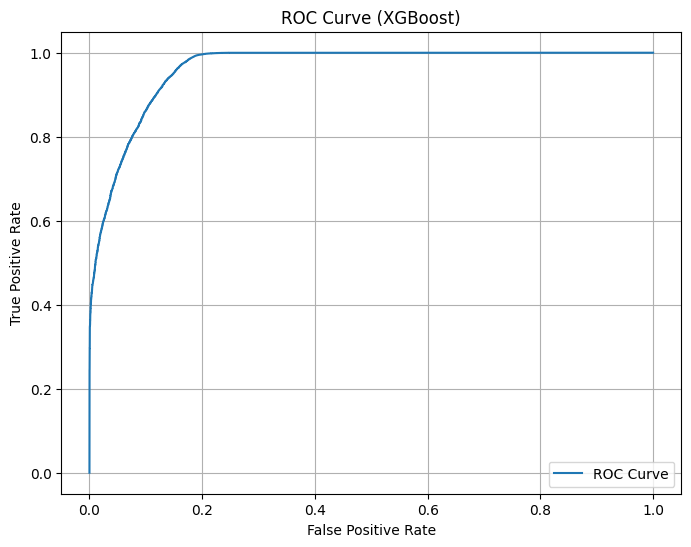

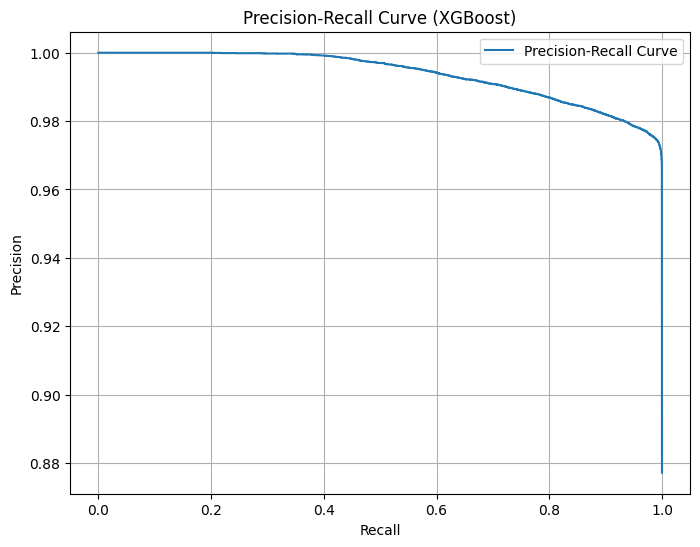

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, xgb_model.predict_proba(X_test)[:,1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBoost)')
plt.grid(True)
plt.legend()
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (XGBoost)')
plt.grid(True)
plt.legend()
plt.show()
